# Drift vs Impact  


## This notebook explores how drift in high & low impact features affect model performance. A binary classification model will be considered for simplicity - this model will be trained using a surgical complications dataset.

## October 4th 2021
### Jose M Albornoz

# Import necessary modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
style.use('fivethirtyeight')
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.inspection import permutation_importance

RANDOM_STATE = 801
pd.options.mode.chained_assignment = None

# 1.- Load data

In [2]:
df_0 = pd.read_csv('surgical-dataset.csv')

In [3]:
df_0.shape

(2000, 25)

In [4]:
df_0.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,28.98,90.0,1,0,0,1,0,0,0,1,...,-1.97,0,1,9.12,8,0,0,-2.25,1,0
1,31.17,40.4,0,0,0,0,0,0,0,0,...,0.00,4,1,11.43,0,0,0,0.00,1,0
2,27.11,37.3,0,0,0,0,0,0,0,0,...,0.00,3,0,9.68,4,1,0,0.00,2,0
3,25.88,41.2,0,0,0,0,0,0,0,1,...,-2.53,1,0,9.45,0,3,0,-2.50,1,0
4,23.18,73.4,1,1,3,1,0,1,0,0,...,0.06,4,0,8.33,0,1,0,-1.58,1,0


In [5]:
df_0.dtypes

bmi                    float64
Age                    float64
asa_status               int64
baseline_cancer          int64
baseline_charlson        int64
baseline_cvd             int64
baseline_dementia        int64
baseline_diabetes        int64
baseline_digestive       int64
baseline_osteoart        int64
baseline_psych           int64
baseline_pulmonary       int64
ahrq_ccs                 int64
ccsComplicationRate    float64
ccsMort30Rate          float64
complication_rsi       float64
dow                      int64
gender                   int64
hour                   float64
month                    int64
moonphase                int64
mort30                   int64
mortality_rsi          float64
race                     int64
complication             int64
dtype: object

## 1.1.- Class balance

In [6]:
np.bincount(df_0['complication'])

array([1485,  515])

In [7]:
np.bincount(df_0['complication'])*100/len(df_0)

array([74.25, 25.75])

## 1.2.- Missing values?

In [8]:
df_0.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

There are no missing values in the dataset

# 2.- Model Build

## 2.1.- Training and testing sets

In [9]:
train, test = train_test_split(df_0, test_size=0.2, random_state=42, shuffle=True)

In [10]:
X_train = train.drop('complication', axis=1).values

In [11]:
y_train = train['complication'].values

In [12]:
X_test = test.drop('complication', axis=1).values

In [13]:
y_test = test['complication'].values

## 2.2.- Model training

In [14]:
clf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1) 

In [15]:
model = clf.fit(X_train, y_train)

## 2.3.- Permutation Importance

A measure of feature importance will be obtaines using permutation importance.

In [16]:
r = permutation_importance(model, X_test, y_test,
...                            n_repeats=30,
...                            random_state=0)

In [17]:
for i in r.importances_mean.argsort()[::-1]:
         print(f"{df_0.columns[i]:<20}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

Age                 0.085 +/- 0.014
ccsComplicationRate 0.013 +/- 0.007
complication_rsi    0.012 +/- 0.009
mortality_rsi       0.008 +/- 0.008
baseline_charlson   0.008 +/- 0.003
month               0.005 +/- 0.005
gender              0.005 +/- 0.003
hour                0.004 +/- 0.004
bmi                 0.003 +/- 0.008
baseline_cvd        0.002 +/- 0.003
ccsMort30Rate       0.002 +/- 0.007
baseline_psych      0.002 +/- 0.002
dow                 0.002 +/- 0.005
moonphase           0.002 +/- 0.005
baseline_osteoart   0.001 +/- 0.003
baseline_digestive  0.001 +/- 0.001
race                0.001 +/- 0.001
baseline_pulmonary  0.000 +/- 0.002
mort30              0.000 +/- 0.000
baseline_dementia   -0.000 +/- 0.001
ahrq_ccs            -0.001 +/- 0.005
baseline_diabetes   -0.001 +/- 0.002
asa_status          -0.001 +/- 0.003
baseline_cancer     -0.003 +/- 0.003


## 2.4.- Baseline model performance - Accuracy

In [18]:
y_pred = model.predict(X_test)

In [19]:
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_accuracy

0.8275

## 2.5.- Baseline model performance - Recall

In [20]:
baseline_recall = recall_score(y_test, y_pred)
baseline_recall

0.5377358490566038

## 2.6.- Baseline model performance - Precision

In [21]:
baseline_precision = precision_score(y_test, y_pred)
baseline_precision

0.7402597402597403

# 3.- Severe drift in impactful features

In [22]:
test_drift_severe = test.copy()

<AxesSubplot:>

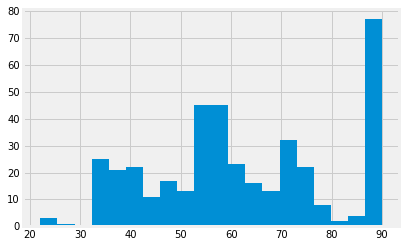

In [23]:
test_drift_severe['Age'].hist(bins=20)

### Let's introduce some severe drift by changing mean and variance

In [24]:
test_drift_severe['Age'] = test_drift_severe['Age']*0.15 + 10

<AxesSubplot:>

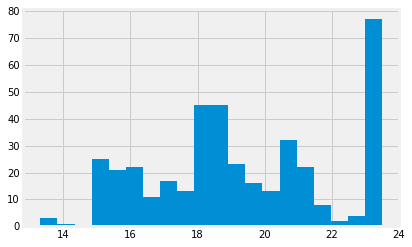

In [25]:
test_drift_severe['Age'].hist(bins=20)

In [26]:
X_test_drift_severe= test_drift_severe.drop('complication', axis=1).values

In [27]:
y_pred_drift_severe = model.predict(X_test_drift_severe)

## 3.1.- Severe drift in impactful feature - Accuracy

In [28]:
drift_severe_accuracy = accuracy_score(y_test, y_pred_drift_severe)
drift_severe_accuracy

0.785

### Severe drift in impactful feature: percentual change in accuracy:

In [29]:
abs(baseline_accuracy - drift_severe_accuracy)*100/baseline_accuracy

5.135951661631418

## 3.2.- Severe drift in impactful feature - Recall

In [30]:
drift_severe_recall = recall_score(y_test, y_pred_drift_severe)
drift_severe_recall

0.41509433962264153

### Severe drift in impactful feature: percentual change in recall:

In [31]:
abs(baseline_recall - drift_severe_recall)*100/baseline_recall

22.807017543859644

## 3.3.- Severe drift in impactful feature -  Precision

In [32]:
drift_severe_precision = precision_score(y_test, y_pred_drift_severe)
drift_severe_precision

0.6470588235294118

### Severe drift in impactful feature: percentual change in precision:

In [33]:
abs(baseline_precision - drift_severe_precision)*100/baseline_precision

12.590299277605778

# 4.- Slight drift in impactful features

In [34]:
test_drift_slight = test.copy()

<AxesSubplot:>

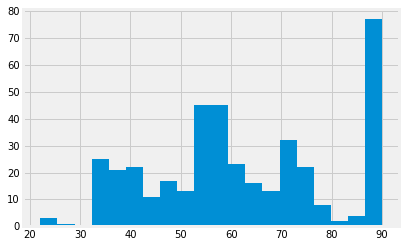

In [35]:
test_drift_slight['Age'].hist(bins=20)

### Let's introduce some slight drift by changing mean and variance

In [36]:
test_drift_slight['Age'] = test_drift_slight['Age']*0.95 + 1

<AxesSubplot:>

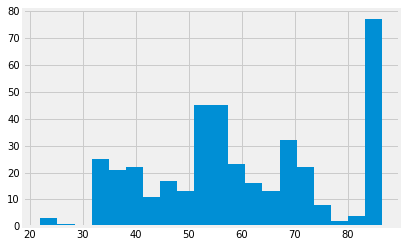

In [37]:
test_drift_slight['Age'].hist(bins=20)

In [38]:
X_test_drift_slight= test_drift_slight.drop('complication', axis=1).values

In [39]:
y_pred_drift_slight = model.predict(X_test_drift_slight)

## 4.1.- Slight drift in impactful features - Accuracy

In [40]:
drift_slight_accuracy = accuracy_score(y_test, y_pred_drift_slight)
drift_slight_accuracy

0.8025

### Slight drift in impactful features: percentual change in accuracy:

In [41]:
abs(baseline_accuracy - drift_slight_accuracy)*100/baseline_accuracy

3.0211480362537793

## 4.2.- Slight drift in impactful features - Recall

In [42]:
drift_slight_recall = recall_score(y_test, y_pred_drift_slight)
drift_slight_recall

0.4811320754716981

### Slight drift in impactful features: percentual change in recall:

In [43]:
abs(baseline_recall - drift_slight_recall)*100/baseline_recall

10.526315789473681

## 4.2.- Slight drift in impactful features - Precision

In [44]:
drift_slight_precision = precision_score(y_test, y_pred_drift_slight)
drift_slight_precision

0.68

### Slight drift in impactful features: percentual change in precision:

In [45]:
abs(baseline_precision - drift_slight_precision)*100/baseline_precision

8.14035087719298

# 5.- Drift in low-impact features

In [46]:
test_drift_low_impact = test.copy()

<AxesSubplot:>

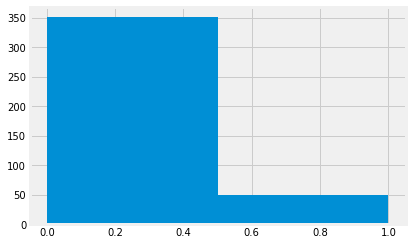

In [47]:
test_drift_low_impact['baseline_pulmonary'].hist(bins=2)

## Let's introduce some severe drift by flipping the values of this binary feature

In [48]:
test_drift_low_impact['baseline_pulmonary'] = test_drift_low_impact['baseline_pulmonary'].replace({0:1, 1:0})

<AxesSubplot:>

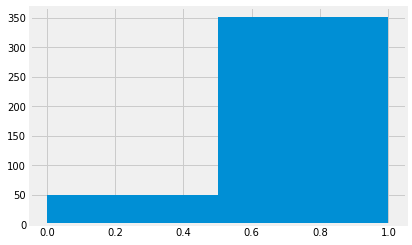

In [49]:
test_drift_low_impact['baseline_pulmonary'].hist(bins=2)

In [50]:
X_test_drift_low_impact = test_drift_low_impact.drop('complication', axis=1).values

In [51]:
y_test_drift_low_impact = model.predict(X_test_drift_low_impact)

## 5.1.- Drift in low-impact features - Accuracy

In [52]:
drift_low_impact_accuracy = accuracy_score(y_test, y_test_drift_low_impact)
drift_low_impact_accuracy

0.83

### Drift in low-impact features: percentual change in accuracy:

In [53]:
abs(baseline_accuracy - drift_low_impact_accuracy)*100/baseline_accuracy

0.3021148036253712

## 5.2.- Drift in low-impact features - Recall

In [54]:
drift_low_impact_recall = recall_score(y_test, y_test_drift_low_impact)
drift_low_impact_recall

0.5377358490566038

### Drift in low-impact features: percentual change in recall:

In [55]:
abs(baseline_recall - drift_low_impact_recall)*100/baseline_recall

0.0

## 5.3.- Drift in low-impact features - Precision

In [56]:
drift_low_impact_precision = precision_score(y_test, y_test_drift_low_impact)
drift_low_impact_precision

0.75

### Drift in low-impact features: percentual change in precision:

In [57]:
abs(baseline_precision - drift_low_impact_precision)*100/baseline_precision

1.315789473684207